# Softmax Function and its Preferred Organization

* 选用kernel learning_dl
~~~
conda activate learning_dl 

pip install ipympl

# conda remove --name learning_dl --all
# kill -9 +id
~~~

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from IPython.display import display, Markdown, Latex
from sklearn.datasets import make_blobs
%matplotlib widget
from matplotlib.widgets import Slider
from lab_utils_common import dlc
from lab_utils_softmax import plt_softmax
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

print("finish import module!!!")

finish import module!!!


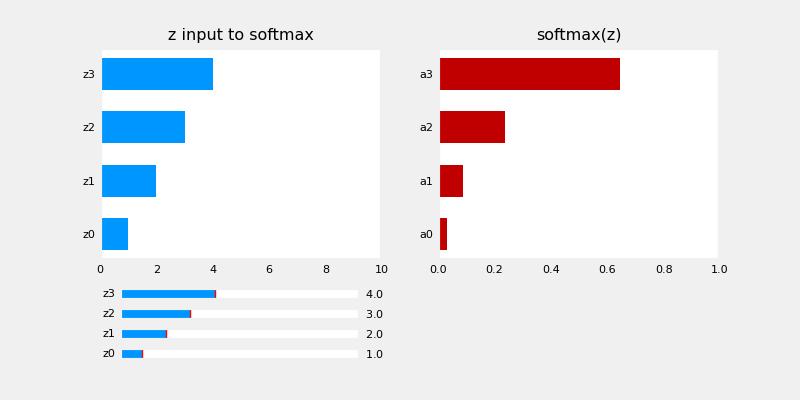

Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 1.1570310592651367, 'type': 'set_device_pixel_ratio'}


In [4]:
#首先是定义softmax函数
def my_softmax(z):
    ez = np.exp(z)              #element-wise exponenial
    sm = ez/np.sum(ez)
    return(sm)

plt.close("all")
plt_softmax(my_softmax)

#通过交互界面，不同的z值会影响softmax函数的输出（其他的a值）

In [6]:
#接下来首先创建一个多分类问题的数据
# make  dataset for example
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0,random_state=30)

# 定义模型如下：
model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'softmax')    # < softmax activation here(用于多分类问题，而其他的激活函数都是用relu)
    ]
)

# 选用的损失函数是交叉熵损失函数（也就是softmax对应的损失函数），优化器是Adam
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

# 训练模型，10代
model.fit(
    X_train,y_train,
    epochs=10
)

Epoch 1/10
63/63 [==============================] - 2s 5ms/step - loss: 1.3929
Epoch 2/10
63/63 [==============================] - 0s 3ms/step - loss: 0.7349
Epoch 3/10
63/63 [==============================] - 0s 3ms/step - loss: 0.3390
Epoch 4/10
63/63 [==============================] - 0s 3ms/step - loss: 0.1525
Epoch 5/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0919
Epoch 6/10
63/63 [==============================] - 0s 4ms/step - loss: 0.0691
Epoch 7/10
63/63 [==============================] - 0s 5ms/step - loss: 0.0580
Epoch 8/10
63/63 [==============================] - 0s 5ms/step - loss: 0.0509
Epoch 9/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0461
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0428


In [7]:
#进行模型的预测
p_nonpreferred = model.predict(X_train)
print(p_nonpreferred [:2])
print("largest value", np.max(p_nonpreferred), "smallest value", np.min(p_nonpreferred))

[[1.01e-03 1.16e-03 9.82e-01 1.58e-02]
 [9.90e-01 7.01e-03 3.03e-03 6.61e-05]]
largest value 1.0 smallest value 1.1172574e-17


In [8]:
#下面不直接使用softmax函数，而是使用from_logits = True，如课程中所讲，这样可以避免数值不稳定的问题
preferred_model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'linear')   #<-- Note（相比起上面的模型，此处为线性方程）
    ]
)
preferred_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #<-- Note
    optimizer=tf.keras.optimizers.Adam(0.001),
)

preferred_model.fit(
    X_train,y_train,
    epochs=10
)

Epoch 1/10
63/63 [==============================] - 0s 2ms/step - loss: 0.9040
Epoch 2/10
63/63 [==============================] - 0s 5ms/step - loss: 0.3550
Epoch 3/10
63/63 [==============================] - 0s 5ms/step - loss: 0.1671
Epoch 4/10
63/63 [==============================] - 0s 4ms/step - loss: 0.1054
Epoch 5/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0798
Epoch 6/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0659
Epoch 7/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0579
Epoch 8/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0522
Epoch 9/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0480
Epoch 10/10
63/63 [==============================] - 0s 5ms/step - loss: 0.0448


In [11]:
p_preferred = preferred_model.predict(X_train)
print(f"two example output vectors:\n {p_preferred[:2]}")
print("largest value", np.max(p_preferred), "smallest value", np.min(p_preferred))
# 由于前面用了线性函数，输出的结果再不再是概率，所以需要用softmax函数来转换

sm_preferred = tf.nn.softmax(p_preferred).numpy()
print(f"two example output vectors:\n {sm_preferred[:2]}")
print("largest value", np.max(sm_preferred), "smallest value", np.min(sm_preferred))

# 进一步的下面输出每个样本的预测结果
for i in range(5):
    print( f"{p_preferred[i]}, category: {np.argmax(p_preferred[i])}")

two example output vectors:
 [[-0.48 -3.75  4.27  0.74]
 [ 5.86  0.84 -2.5  -6.15]]
largest value 15.019214 smallest value -11.249103
two example output vectors:
 [[8.31e-03 3.14e-04 9.63e-01 2.81e-02]
 [9.93e-01 6.53e-03 2.33e-04 6.00e-06]]
largest value 0.99999917 smallest value 5.483475e-11
[-0.48 -3.75  4.27  0.74], category: 2
[ 5.86  0.84 -2.5  -6.15], category: 0
[ 4.25  1.18 -2.02 -4.68], category: 0
[-0.14  4.38 -2.28 -0.9 ], category: 1
[ 1.01 -6.14  5.74 -2.51], category: 2
